<a href="https://colab.research.google.com/github/linchunjen/Sleeping_data/blob/master/Exercise_9_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 9.5: Go From Mockup to Build in Matplotlib

## Basic setting and data loading

In [102]:
# load packages and data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

df = pd.read_csv("/content/drive/My Drive/Week09_exercise/Lekagul Sensor Data.csv")

In [103]:
# check data
df.head()

,Timestamp,car-id,car-type,gate-name
0,2015-05-01 00:43:28,20154301124328-262,4,entrance3
1,2015-05-01 01:03:48,20154301124328-262,4,general-gate1
2,2015-05-01 01:06:24,20154301124328-262,4,ranger-stop2
3,2015-05-01 01:09:25,20154301124328-262,4,ranger-stop0
4,2015-05-01 01:12:36,20154301124328-262,4,general-gate2


In [104]:
df.shape

(171477, 4)

## 1) Plot a histogram of car types at entrance 1

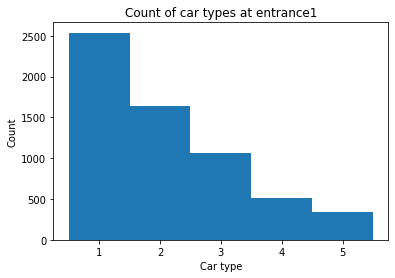

In [105]:
# plot histogram of car types at entrance 1
plt.hist(pd.to_numeric(df[df["gate-name"] == "entrance1"]["car-type"]),bins=np.arange(6)+0.5)
plt.xlabel("Car type")
plt.ylabel("Count")
plt.title("Count of car types at entrance1")
plt.show()

## 2) Plot histograms of car types at all entrances.

In [106]:
# check type of gate names
df['gate-name'].unique()

array(['entrance3', 'general-gate1', 'ranger-stop2', 'ranger-stop0',
       'general-gate2', 'general-gate5', 'entrance4', 'entrance1',
       'general-gate7', 'general-gate4', 'entrance2', 'camping6',
       'camping2', 'camping3', 'ranger-base', 'gate8', 'camping0',
       'gate3', 'ranger-stop3', 'camping8', 'general-gate3',
       'general-gate6', 'gate4', 'camping7', 'ranger-stop5', 'gate5',
       'ranger-stop6', 'entrance0', 'camping5', 'ranger-stop4', 'gate6',
       'gate7', 'ranger-stop7', 'camping4', 'gate2', 'ranger-stop1',
       'general-gate0', 'camping1', 'gate1', 'gate0'], dtype=object)

In [107]:
# check entrance type
entrance_df = df[['entrance' in i for i in df['gate-name']]]
entrance_df['gate-name'].unique()

array(['entrance3', 'entrance4', 'entrance1', 'entrance2', 'entrance0'],
      dtype=object)

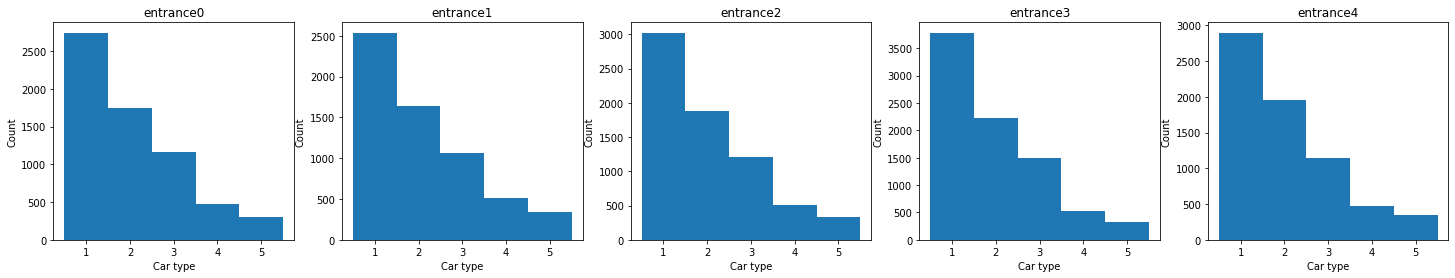

In [110]:
# plot histograms of car types at all entrances
fig, axs = plt.subplots(1, 5, figsize = (25, 4))
axs[0].hist(pd.to_numeric(df[df["gate-name"] == "entrance0"]["car-type"]),bins=np.arange(6)+0.5)
axs[0].set_title('entrance0')
axs[1].hist(pd.to_numeric(df[df["gate-name"] == "entrance1"]["car-type"]),bins=np.arange(6)+0.5)
axs[1].set_title('entrance1')
axs[2].hist(pd.to_numeric(df[df["gate-name"] == "entrance2"]["car-type"]),bins=np.arange(6)+0.5)
axs[2].set_title('entrance2')
axs[3].hist(pd.to_numeric(df[df["gate-name"] == "entrance3"]["car-type"]),bins=np.arange(6)+0.5)
axs[3].set_title('entrance3')
axs[4].hist(pd.to_numeric(df[df["gate-name"] == "entrance4"]["car-type"]),bins=np.arange(6)+0.5)
axs[4].set_title('entrance4')
for ax in axs.flat:
    ax.set(xlabel='Car type', ylabel='Count')
plt.show()

## 3) Plot the count of daily visits grouped by day for the whole dataset.

In [111]:
# check group data of date
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).date)
g['Timestamp'].count().head()

2015-05-01    324
2015-05-02    298
2015-05-03    293
2015-05-04    336
2015-05-05    250
Name: Timestamp, dtype: int64

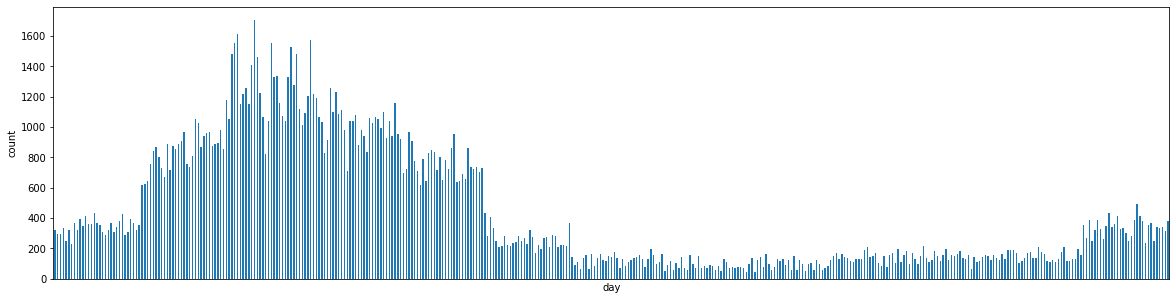

In [113]:
# plot daily visits grouped by day
g['Timestamp'].count().plot(kind = 'bar', figsize = (20, 5))
plt.xlabel('day')
plt.ylabel('count')
plt.xticks([])
plt.show()

## 4) Same as plot (3), but plot a separate line for each car type.

In [101]:
# create a dictionary of grouping data for line plot
dict_car = {}
for car_type in df["car-type"].unique():
  g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).date)
  dict_car.update({car_type:g['Timestamp'].count()})

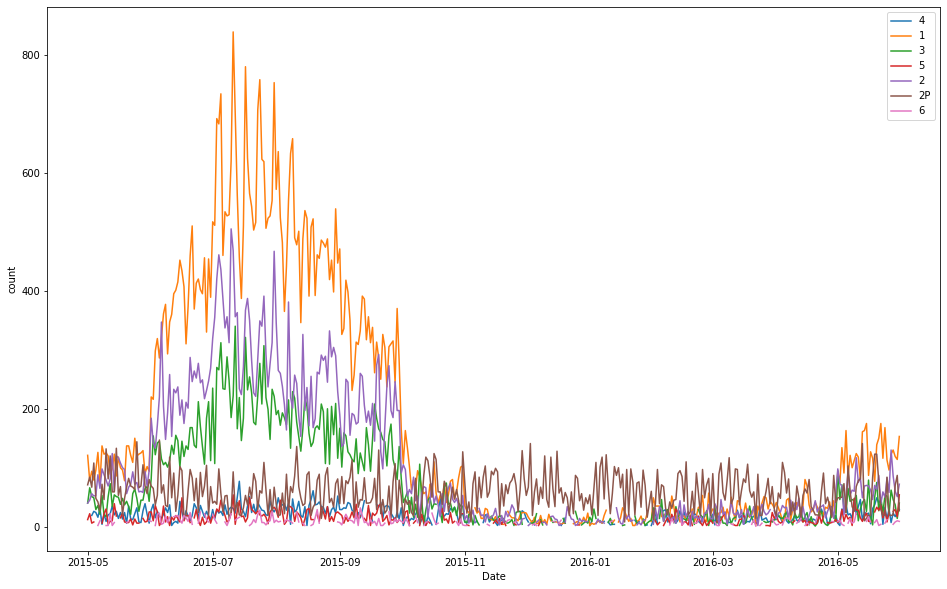

In [114]:
# plot a separate line for each car type
df_g = pd.DataFrame(dict_car)
df_g.plot(kind="line", figsize = (16, 10))
plt.xlabel('Date')
plt.ylabel('count')
plt.show()

## 5) Repeat plot 3, but group by the hour.

In [19]:
# check group data
g = df.groupby(pd.DatetimeIndex(pd.to_datetime(df["Timestamp"])).hour)
g['Timestamp'].count().head()

Timestamp
0    2098
1    1772
2    1752
3    2033
4    1926
Name: Timestamp, dtype: int64

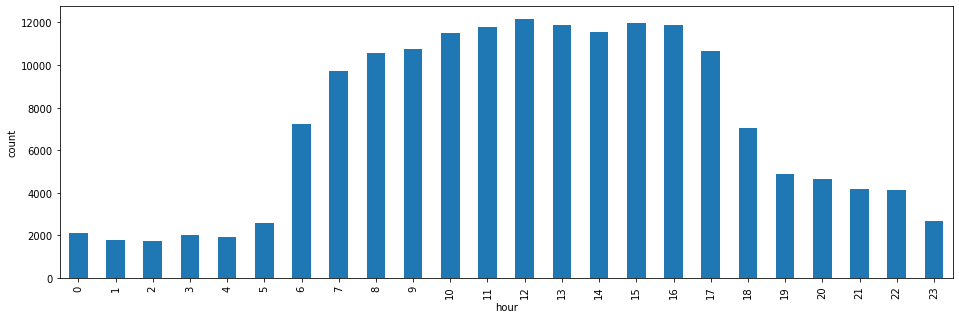

In [20]:
# daily visits grouped by hour
g['Timestamp'].count().plot(kind = 'bar', figsize = (16, 5))
plt.xlabel('hour')
plt.ylabel('count')
plt.show()

## 6) Repeat plot 4, grouping by the day of week, and show a stacked bar chart for each car type.

In [95]:
# check grouping data
dict_car = {}
for car_type in df["car-type"].unique():
  g = df[df["car-type"] == car_type].groupby(pd.DatetimeIndex(df[df["car-type"] == car_type]["Timestamp"]).dayofweek)
  dict_car.update({car_type:g['Timestamp'].count()})
# print(dict_car)

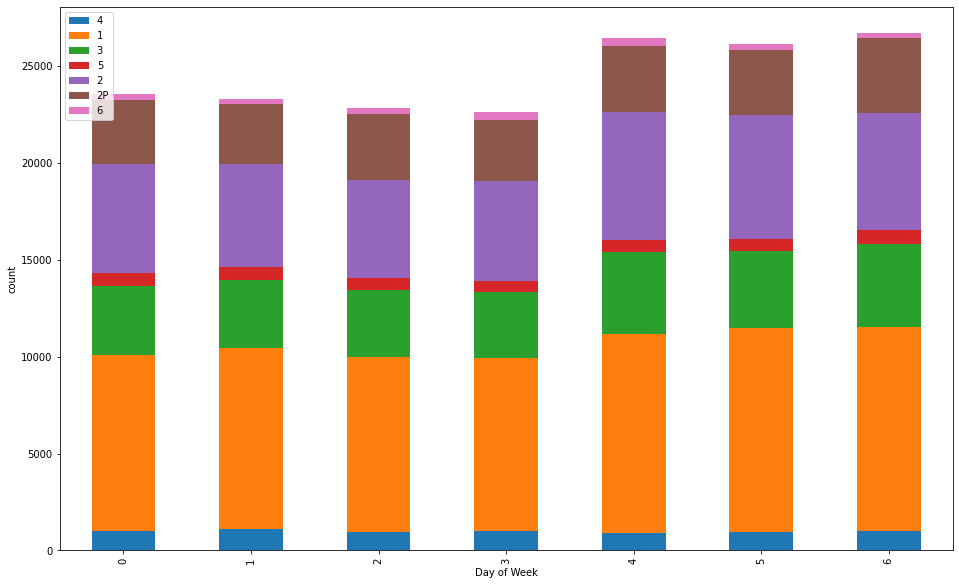

In [98]:
# create stack bar chart
df_g = pd.DataFrame(dict_car)
df_g.plot(kind="bar", stacked=True, figsize = (16, 10))
plt.xlabel('Day of Week')
plt.ylabel('count')
plt.show()